### Prediction Model

In [1]:
import pandas as pd

data = pd.read_csv('data2.csv')

print(data.head())
print(data.info())
print(data.describe())
# Rename columns to align with the R example
data.rename(columns={
    'Participant_ID': 'ParticipantID',
    'Age': 'Age',
    'Gender': 'Gender',
    'Inattention_Score': 'Inattention',
    'Hyperactivity_Score': 'Hyperactivity',
    'Overall_ADHD_Severity': 'ADHDSeverity',
    'Comorbid_Conditions': 'ComorbidConditions',
    'Family_ADHD_History': 'FamilyADHDHistory',
    'Family_Members_with_ADHD': 'FamilyMembersADHD',
    'IQ_Score': 'IQScore',
    'Working_Memory_Score': 'WorkingMemory',
    'Executive_Functioning_Score': 'ExecutiveFunctioning',
    'Medication_Type': 'MedicationType',
    'Medication_Duration_Years': 'MedicationDuration',
    'Behavioral_Therapy_History': 'TherapyHistory',
    'Ethnicity': 'Ethnicity',
    'Education_Level': 'EducationLevel',
    'Geographic_Region': 'Region',
    'Languages_Spoken_at_Home': 'LanguagesAtHome',
    'Maternal_Smoking_During_Pregnancy': 'MaternalSmoking',
    'Alcohol_Use_During_Pregnancy': 'AlcoholUse',
    'Drug_Use_During_Pregnancy': 'DrugUse',
    'Maternal_Stress_Levels': 'MaternalStress',
    'Birth_Weight_kg': 'BirthWeight',
    'Gestational_Age_Weeks': 'GestationalAge',
    'Early_Childhood_Illnesses': 'Childhood'
}, inplace=True)

   Participant_ID  Age      Gender  Inattention_Score  Hyperactivity_Score  \
0               1   13  Non-binary                  2                    7   
1               2   14        Male                  8                   26   
2               3   11      Female                  1                   24   
3               4   15  Non-binary                 18                   24   
4               5   15  Non-binary                 13                   24   

   Overall_ADHD_Severity Comorbid_Conditions Family_ADHD_History  \
0                     40                 NaN                 Yes   
1                     52          Depression                  No   
2                     27            Multiple                 Yes   
3                     23             Anxiety                  No   
4                     21                 NaN                  No   

   Family_Members_with_ADHD  IQ_Score  ...  Parental_Education_Level  \
0                         1       128  ...        

In [2]:
# Check for missing values
print(data.isnull().sum())

# Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns

# Impute missing values in numeric columns with their median
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

non_numeric_cols = data.select_dtypes(exclude=['number']).columns
data[non_numeric_cols] = data[non_numeric_cols].fillna(data[non_numeric_cols].mode().iloc[0])

print(data.isnull().sum())


ParticipantID                           0
Age                                     0
Gender                                  0
Inattention                             0
Hyperactivity                           0
ADHDSeverity                            0
ComorbidConditions                   1989
FamilyADHDHistory                       0
FamilyMembersADHD                       0
IQScore                                 0
WorkingMemory                           0
ExecutiveFunctioning                    0
MedicationType                       3267
MedicationDuration                      0
TherapyHistory                          0
Ethnicity                               0
EducationLevel                          0
Region                                  0
LanguagesAtHome                         0
MaternalSmoking                         0
AlcoholUse                              0
DrugUse                                 0
MaternalStress                          0
BirthWeight                       

### Baseline Model: Linear Regression

We will use sklearn to do linear regression and random forest, we will need to encode all categorical variable:

In [3]:
from sklearn.preprocessing import LabelEncoder

# Define features (X) and target variable (y)
X = data.drop(columns=['ADHDSeverity'])  # Independent variables
y = data['ADHDSeverity']  # Target variable

# Label encode 'Gender' before one-hot encoding
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(data['Gender'])

# Identify non-numeric columns
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

# One-hot encode the remaining categorical variables
X = pd.get_dummies(X, drop_first=True)

# Check the updated dataset
print(X.head())


Categorical columns: Index(['ComorbidConditions', 'FamilyADHDHistory', 'MedicationType',
       'TherapyHistory', 'Ethnicity', 'EducationLevel', 'Region',
       'LanguagesAtHome', 'MaternalSmoking', 'AlcoholUse', 'DrugUse',
       'MaternalStress', 'Childhood', 'Family_Income_Level',
       'Parental_Education_Level', 'Parental_Occupation', 'Parenting_Style',
       'Parental_Involvement_in_Education', 'Domestic_Violence_History',
       'Marital_Status_of_Parents', 'School_Type'],
      dtype='object')
   ParticipantID  Age  Gender  Inattention  Hyperactivity  FamilyMembersADHD  \
0              1   13       2            2              7                  1   
1              2   14       1            8             26                  4   
2              3   11       0            1             24                  3   
3              4   15       2           18             24                  2   
4              5   15       2           13             24                  3   

   IQScor

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Linear Regression Model Performance:
Mean Absolute Error (MAE): 13.410094012683011
R-squared (R²): -0.00106120343823779


We will do some improvement to see if this can be improved.

In [5]:
from sklearn.linear_model import Ridge, Lasso

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_ridge_pred = ridge_model.predict(X_test)
y_lasso_pred = lasso_model.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_ridge_pred)
r2_ridge = r2_score(y_test, y_ridge_pred)

mae_lasso = mean_absolute_error(y_test, y_lasso_pred)
r2_lasso = r2_score(y_test, y_lasso_pred)

print("Ridge Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_ridge}")
print(f"R-squared (R²): {r2_ridge}")
print("\nLasso Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_lasso}")
print(f"R-squared (R²): {r2_lasso}")

Ridge Regression Model Performance:
Mean Absolute Error (MAE): 13.410096416757039
R-squared (R²): -0.0010594009280626704

Lasso Regression Model Performance:
Mean Absolute Error (MAE): 13.412278091436718
R-squared (R²): -0.0004715989359485029


### Random Forest

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared (R²): {r2_rf}")


Random Forest Model Performance:
Mean Absolute Error (MAE): 13.39681
R-squared (R²): -0.010490969708885078


Top Features:

**ParticipantID**: This feature is likely acting as a unique identifier and should be dropped since it carries no meaningful predictive information.

**BirthWeight and ExecutiveFunctioning**: These are the most important features, suggesting a potential relationship with ADHD severity.

**IQScore**, **WorkingMemory**, and **GestationalAge** also show moderate importance.


Low Importance Features:

Many categorical features like ParentalOccupation, LanguagesAtHome, and ComorbidConditions have very low importance, indicating they contribute little to the model.

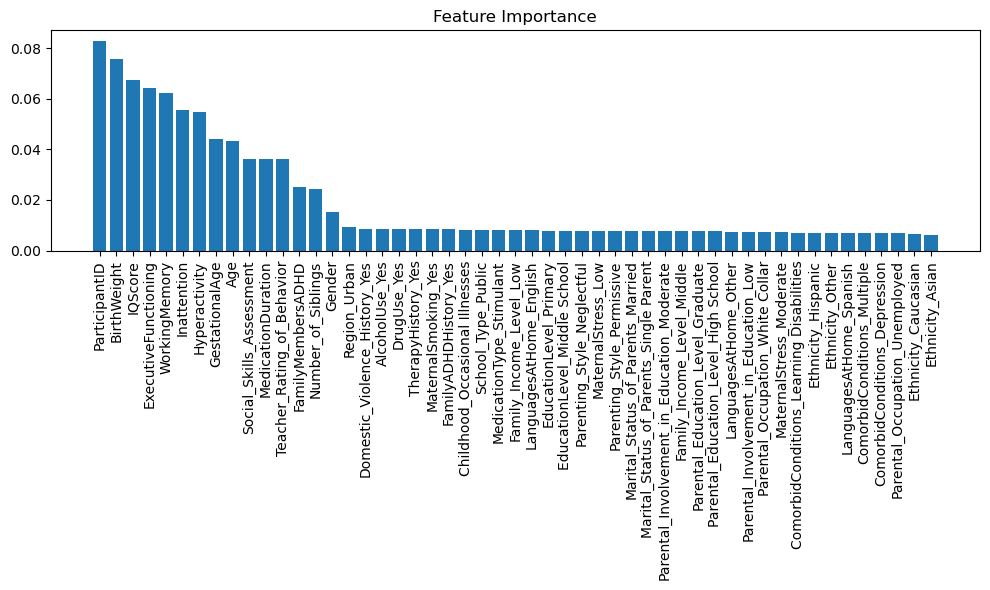

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance
importance = rf_model.feature_importances_
indices = np.argsort(importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importance[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [8]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=rf_model, n_features_to_select=10, step=1)  # Select top 10 features
rfe.fit(X_train, y_train)

# Get the ranking of features
ranking = rfe.ranking_
selected_features = X.columns[rfe.support_]
print("Selected Features (Top 10):", selected_features)

# Reduce the dataset to the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the model on selected features
rf_model.fit(X_train_rfe, y_train)
y_pred = rf_model.predict(X_test_rfe)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance After Feature Selection:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

KeyboardInterrupt: 

## Feature Engineering

In [9]:
import itertools
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Retain only the top features selected by RFE (excluding ParticipantID)
selected_features = [
    'Age', 'Inattention', 'Hyperactivity', 'IQScore',
    'WorkingMemory', 'ExecutiveFunctioning', 'MedicationDuration',
    'BirthWeight', 'GestationalAge'
]

# Step 1: Focus on interactions between numerical features
numerical_features = ['Age', 'Inattention', 'Hyperactivity', 'IQScore',
                      'WorkingMemory', 'ExecutiveFunctioning', 'BirthWeight', 'GestationalAge']

# Automatically generate interaction terms for numerical features
for feature_pair in itertools.combinations(numerical_features, 2):
    feature1, feature2 = feature_pair
    X[f"{feature1}_x_{feature2}"] = X[feature1] * X[feature2]

# Step 2: Create composite features where appropriate
# Cognitive abilities composite score
X['CognitiveScore'] = (X['IQScore'] + X['WorkingMemory'] + X['ExecutiveFunctioning']) / 3

# ADHD severity composite (Inattention + Hyperactivity)
X['ADHDComposite'] = X['Inattention'] + X['Hyperactivity']

# Step 3: Standardize numerical features and interaction terms
scaler = StandardScaler()

# Identify all interaction features created
interaction_features = [col for col in X.columns if "_x_" in col]

# Standardize interaction features and numerical features
X[numerical_features + interaction_features] = scaler.fit_transform(X[numerical_features + interaction_features])

# Step 4: Verify the modified dataset
print("Modified Dataset with Interaction Terms and Grouped Features:")
print(X.head())


Modified Dataset with Interaction Terms and Grouped Features:
   ParticipantID       Age  Gender  Inattention  Hyperactivity  \
0              1  0.531114       2    -1.403782      -0.767006   
1              2  0.798651       1    -0.634355       1.665090   
2              3 -0.003960       0    -1.532020       1.409080   
3              4  1.066187       2     0.648025       1.409080   
4              5  1.066187       2     0.006835       1.409080   

   FamilyMembersADHD   IQScore  WorkingMemory  ExecutiveFunctioning  \
0                  1  0.662638       0.386704              1.001754   
1                  4 -1.256027       0.177769             -1.290811   
2                  3  0.908621       0.804573             -0.248736   
3                  2 -1.010044      -1.215131             -1.638170   
4                  3  0.908621      -0.309746              1.349112   

   MedicationDuration  ...  IQScore_x_BirthWeight  IQScore_x_GestationalAge  \
0                   5  ...         

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Split the modified dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance After Feature Engineering:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Model Performance After Feature Engineering:
Mean Absolute Error (MAE): 13.423720000000001
R-squared (R²): -0.013268111441547159


### LLM in Prediction

In [11]:
data = pd.read_csv('data2.csv')

data.rename(columns={
    'Participant_ID': 'ParticipantID',
    'Age': 'Age',
    'Gender': 'Gender',
    'Inattention_Score': 'Inattention',
    'Hyperactivity_Score': 'Hyperactivity',
    'Overall_ADHD_Severity': 'ADHDSeverity',
    'Comorbid_Conditions': 'ComorbidConditions',
    'Family_ADHD_History': 'FamilyADHDHistory',
    'Family_Members_with_ADHD': 'FamilyMembersADHD',
    'IQ_Score': 'IQScore',
    'Working_Memory_Score': 'WorkingMemory',
    'Executive_Functioning_Score': 'ExecutiveFunctioning',
    'Medication_Type': 'MedicationType',
    'Medication_Duration_Years': 'MedicationDuration',
    'Behavioral_Therapy_History': 'TherapyHistory',
    'Ethnicity': 'Ethnicity',
    'Education_Level': 'EducationLevel',
    'Geographic_Region': 'Region',
    'Languages_Spoken_at_Home': 'LanguagesAtHome',
    'Maternal_Smoking_During_Pregnancy': 'MaternalSmoking',
    'Alcohol_Use_During_Pregnancy': 'AlcoholUse',
    'Drug_Use_During_Pregnancy': 'DrugUse',
    'Maternal_Stress_Levels': 'MaternalStress',
    'Birth_Weight_kg': 'BirthWeight',
    'Gestational_Age_Weeks': 'GestationalAge',
    'Early_Childhood_Illnesses': 'Childhood'
}, inplace=True)

print("Dataset Preview:")
display(data.head())  # First few rows

print("\nDataset Info:")
data_info = data.info()  # Column names and data types
print(data_info)

print("\nStatistical Summary:")
stat_summary = data.describe(include='all')  # Descriptive statistics for all columns
display(stat_summary)

print("\nColumn Names:")
columns = data.columns.tolist()  # Extract column names
print(columns)

print("\nTarget Variable:")
# Replace 'target_column_name' with the actual target column name (or remove if not applicable)
target_column = 'ADHDSeverity'
if target_column in data.columns:
    print(f"Target Variable: {target_column}")
else:
    print("Please specify the target variable name.")

Dataset Preview:


,ParticipantID,Age,Gender,Inattention,Hyperactivity,ADHDSeverity,ComorbidConditions,FamilyADHDHistory,FamilyMembersADHD,IQScore,...,Parental_Education_Level,Parental_Occupation,Parenting_Style,Parental_Involvement_in_Education,Domestic_Violence_History,Marital_Status_of_Parents,Number_of_Siblings,School_Type,Teacher_Rating_of_Behavior,Social_Skills_Assessment
0,1,13,Non-binary,2,7,40,NaN,Yes,1,128,...,High School,Unemployed,Authoritative,High,Yes,Divorced,2,Private,2,4
1,2,14,Male,8,26,52,Depression,No,4,89,...,High School,Blue Collar,Permissive,Low,Yes,Single Parent,1,Public,6,1
2,3,11,Female,1,24,27,Multiple,Yes,3,133,...,Graduate,White Collar,Permissive,High,No,Married,1,Private,5,3
3,4,15,Non-binary,18,24,23,Anxiety,No,2,94,...,College,Unemployed,Neglectful,Moderate,Yes,Divorced,2,Public,6,1
4,5,15,Non-binary,13,24,21,NaN,No,3,133,...,College,White Collar,Authoritative,High,No,Married,0,Private,3,5



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ParticipantID                      10000 non-null  int64  
 1   Age                                10000 non-null  int64  
 2   Gender                             10000 non-null  object 
 3   Inattention                        10000 non-null  int64  
 4   Hyperactivity                      10000 non-null  int64  
 5   ADHDSeverity                       10000 non-null  int64  
 6   ComorbidConditions                 8011 non-null   object 
 7   FamilyADHDHistory                  10000 non-null  object 
 8   FamilyMembersADHD                  10000 non-null  int64  
 9   IQScore                            10000 non-null  int64  
 10  WorkingMemory                      10000 non-null  int64  
 11  ExecutiveFunctioning               10000

,ParticipantID,Age,Gender,Inattention,Hyperactivity,ADHDSeverity,ComorbidConditions,FamilyADHDHistory,FamilyMembersADHD,IQScore,...,Parental_Education_Level,Parental_Occupation,Parenting_Style,Parental_Involvement_in_Education,Domestic_Violence_History,Marital_Status_of_Parents,Number_of_Siblings,School_Type,Teacher_Rating_of_Behavior,Social_Skills_Assessment
count,10000.00000,10000.000000,10000,10000.000000,10000.000000,10000.0000,8011,10000,10000.000000,10000.00000,...,10000,10000,10000,10000,10000,10000,10000.000000,10000,10000.000000,10000.000000
unique,NaN,NaN,3,NaN,NaN,NaN,4,2,NaN,NaN,...,3,3,3,3,2,3,NaN,2,NaN,NaN
top,NaN,NaN,Male,NaN,NaN,NaN,Anxiety,Yes,NaN,NaN,...,High School,Blue Collar,Neglectful,Moderate,Yes,Married,NaN,Private,NaN,NaN
freq,NaN,NaN,3384,NaN,NaN,NaN,2028,5036,NaN,NaN,...,3348,3390,3385,3399,5061,3398,NaN,5052,NaN,NaN
mean,5000.50000,11.014800,NaN,12.946700,12.992000,26.5201,NaN,NaN,1.998400,114.53080,...,NaN,NaN,NaN,NaN,NaN,NaN,2.001100,NaN,4.952200,5.036500
std,2886.89568,3.737991,NaN,7.798393,7.812582,15.5066,NaN,NaN,1.419225,20.32765,...,NaN,NaN,NaN,NaN,NaN,NaN,1.415662,NaN,2.582708,2.580743
min,1.00000,5.000000,NaN,0.000000,0.000000,0.0000,NaN,NaN,0.000000,80.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,1.000000
25%,2500.75000,8.000000,NaN,6.000000,6.000000,13.0000,NaN,NaN,1.000000,97.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,3.000000,3.000000
50%,5000.50000,11.000000,NaN,13.000000,13.000000,27.0000,NaN,NaN,2.000000,115.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,5.000000,5.000000
75%,7500.25000,14.000000,NaN,20.000000,20.000000,40.0000,NaN,NaN,3.000000,132.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,7.000000,7.000000



Column Names:
['ParticipantID', 'Age', 'Gender', 'Inattention', 'Hyperactivity', 'ADHDSeverity', 'ComorbidConditions', 'FamilyADHDHistory', 'FamilyMembersADHD', 'IQScore', 'WorkingMemory', 'ExecutiveFunctioning', 'MedicationType', 'MedicationDuration', 'TherapyHistory', 'Ethnicity', 'EducationLevel', 'Region', 'LanguagesAtHome', 'MaternalSmoking', 'AlcoholUse', 'DrugUse', 'MaternalStress', 'BirthWeight', 'GestationalAge', 'Childhood', 'Family_Income_Level', 'Parental_Education_Level', 'Parental_Occupation', 'Parenting_Style', 'Parental_Involvement_in_Education', 'Domestic_Violence_History', 'Marital_Status_of_Parents', 'Number_of_Siblings', 'School_Type', 'Teacher_Rating_of_Behavior', 'Social_Skills_Assessment']

Target Variable:
Target Variable: ADHDSeverity


### Data Preprocessing

In [12]:
def row_to_text(row):
    # Numerical features
    numerical_info = (
        f"Participant is {row['Age']} years old, with an inattention score of {row['Inattention']}, "
        f"hyperactivity score of {row['Hyperactivity']}, IQ score of {row['IQScore']}, working memory score of {row['WorkingMemory']}, "
        f"and executive functioning score of {row['ExecutiveFunctioning']}. Birth weight is {row['BirthWeight']} kg, and gestational age is {row['GestationalAge']} weeks."
    )
    
    # Categorical features
    categorical_info = (
        f"The participant's gender is {row['Gender']}, ethnicity is {row['Ethnicity']}, "
        f"education level is {row['EducationLevel']}, and region is {row['Region']}. "
        f"Parenting style is {row['Parenting_Style']} and parental involvement in education is {row['Parental_Involvement_in_Education']}."
    )
    
    # Behavioral and medical history
    behavioral_medical_info = (
        f"The participant has {row['ComorbidConditions']} comorbid conditions, "
        f"a family ADHD history: {row['FamilyADHDHistory']}, and family members with ADHD: {row['FamilyMembersADHD']}. "
        f"Medication type: {row['MedicationType']}, duration: {row['MedicationDuration']} years. Therapy history: {row['TherapyHistory']}."
    )
    
    # Combined text with the target variable
    return (
        f"{numerical_info} {categorical_info} {behavioral_medical_info} "
        f"-> Predict ADHDSeverity."
    )

# Apply the transformation to each row
data['text'] = data.apply(row_to_text, axis=1)

# Save the transformed dataset to a new file
data.to_csv('transformed_dataset.csv', index=False)

# Preview transformed text
print(data[['text', 'ADHDSeverity']].head())

                                                text  ADHDSeverity
0  Participant is 13 years old, with an inattenti...            40
1  Participant is 14 years old, with an inattenti...            52
2  Participant is 11 years old, with an inattenti...            27
3  Participant is 15 years old, with an inattenti...            23
4  Participant is 15 years old, with an inattenti...            21


### LLM Prediction

In [13]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
from utils import tokenize_data
from ADHDdataset import ADHDRegressionDataset

/home/coder/conda/envs/mit/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
data = pd.read_csv('transformed_dataset.csv')
texts = data['text'].tolist()  # 'text' column from your transformed dataset
labels = data['ADHDSeverity'].tolist()  # Target variable
train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
train_encodings = tokenize_data(train_texts, train_labels, tokenizer)
test_encodings = tokenize_data(test_texts, test_labels, tokenizer)

/home/coder/conda/envs/mit/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [15]:
train_dataset = ADHDRegressionDataset(train_encodings)
test_dataset = ADHDRegressionDataset(test_encodings)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=1)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Ensure the model is on the GPU
model.to(device)

training_args = TrainingArguments(
    output_dir="./results",          # Directory to save the model
    num_train_epochs=3,              # Number of epochs
    per_device_train_batch_size=8,   # Batch size for training
    per_device_eval_batch_size=16,   # Batch size for evaluation
    warmup_steps=500,                # Warmup steps for learning rate scheduler
    weight_decay=0.01,               # Strength of weight decay
    logging_dir="./logs",            # Directory for storing logs
    logging_steps=10,                # Log every 10 steps
    evaluation_strategy="epoch",     # Evaluate every epoch
    save_strategy="epoch",           # Save model every epoch
    load_best_model_at_end=True,     # Load best model at the end of training
    learning_rate=2e-5,              # Learning rate
)

trainer = Trainer(
    model=model,                         # The model
    args=training_args,                  # Training arguments
    train_dataset=train_dataset,         # Training dataset
    eval_dataset=test_dataset,           # Evaluation dataset
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using device: cuda


In [16]:
trainer.train()

/home/coder/conda/envs/mit/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,278.322200,262.488251
2,218.778800,241.486786
3,255.880300,240.306396


/home/coder/conda/envs/mit/lib/python3.10/site-packages/transformers/trainer.py:2159: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(best_model_path, 

TrainOutput(global_step=3000, training_loss=317.56149267578127, metrics={'train_runtime': 592.9246, 'train_samples_per_second': 40.477, 'train_steps_per_second': 5.06, 'total_flos': 1899315877536000.0, 'train_loss': 317.56149267578127, 'epoch': 3.0})

In [17]:
# Evaluate the model
predictions = trainer.predict(test_dataset)
predicted_values = predictions.predictions.squeeze()  # Regression outputs

from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(test_labels, predicted_values)
r2 = r2_score(test_labels, predicted_values)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 13.436291584968567
R-squared (R²): -0.0019065141677856445


In [18]:
model.save_pretrained("fine_tuned_bert")
tokenizer.save_pretrained("fine_tuned_bert")

('fine_tuned_bert/tokenizer_config.json',
 'fine_tuned_bert/special_tokens_map.json',
 'fine_tuned_bert/vocab.txt',
 'fine_tuned_bert/added_tokens.json',
 'fine_tuned_bert/tokenizer.json')